In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import *
from sklearn.feature_selection import *
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import layers
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
pd.options.display.max_colwidth = 1000
pd.options.display.max_rows = 1000

In [3]:
autism_df = pd.read_csv("train.csv")
autism_df.head(10)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0
5,6,1,0,0,0,0,1,0,0,1,...,m,Middle Eastern,no,no,Jordan,no,9.562117,18 and more,Self,0
6,7,1,0,0,0,0,0,1,1,1,...,f,Pasifika,no,no,United Kingdom,no,7.984569,18 and more,Self,0
7,8,1,1,1,1,1,1,1,0,1,...,m,Black,no,yes,United States,no,13.237898,18 and more,Self,1
8,9,1,1,1,1,0,0,0,1,1,...,m,White-European,no,no,Brazil,no,-1.755774,18 and more,Self,0
9,10,0,0,0,0,0,0,0,1,0,...,f,Others,yes,no,New Zealand,no,14.922570,18 and more,Self,0


In [4]:
print(autism_df.shape)

(800, 22)


In [5]:
for columns in autism_df.select_dtypes('O').columns:
    print(f'Column name: {columns}\n')
    print(f'Unique values:\n{autism_df[columns].unique()}\n\n')

Column name: gender

Unique values:
['f' 'm']


Column name: ethnicity

Unique values:
['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']


Column name: jaundice

Unique values:
['no' 'yes']


Column name: austim

Unique values:
['no' 'yes']


Column name: contry_of_res

Unique values:
['Austria' 'India' 'United States' 'South Africa' 'Jordan'
 'United Kingdom' 'Brazil' 'New Zealand' 'Canada' 'Kazakhstan'
 'United Arab Emirates' 'Australia' 'Ukraine' 'Iraq' 'France' 'Malaysia'
 'Viet Nam' 'Egypt' 'Netherlands' 'Afghanistan' 'Oman' 'Italy'
 'AmericanSamoa' 'Bahamas' 'Saudi Arabia' 'Ireland' 'Aruba' 'Sri Lanka'
 'Russia' 'Bolivia' 'Azerbaijan' 'Armenia' 'Serbia' 'Ethiopia' 'Sweden'
 'Iceland' 'Hong Kong' 'Angola' 'China' 'Germany' 'Spain' 'Tonga'
 'Pakistan' 'Iran' 'Argentina' 'Japan' 'Mexico' 'Nicaragua' 'Sierra Leone'
 'Czech Republic' 'Niger' 'Romania' 'Cyprus' 'Belgium' 'Burundi'
 'Bangladesh']


Column n

In [6]:
autism_df['ethnicity'] = autism_df['ethnicity'].replace('?', 'Others')
autism_df['ethnicity'] = autism_df['ethnicity'].replace('others', 'Others')
autism_df['ethnicity'].unique()

array(['Others', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino'],
      dtype=object)

In [7]:
autism_df = autism_df.drop({"ID","age_desc","used_app_before","relation"}, axis = 1)
autism_df.ethnicity.fillna("Unknown", inplace = True)

autism_df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,result,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.172746,f,Others,no,no,Austria,6.351166,0
1,0,0,0,0,0,0,0,0,0,0,47.750517,m,Others,no,no,India,2.255185,0
2,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,14.851484,1
3,0,0,0,0,0,0,0,0,0,0,23.561927,f,Others,no,no,United States,2.276617,0
4,0,0,0,0,0,0,0,0,0,0,43.205790,m,Others,no,no,South Africa,-4.777286,0


In [8]:
print(autism_df.isnull().sum(axis = 0))

A1_Score         0
A2_Score         0
A3_Score         0
A4_Score         0
A5_Score         0
A6_Score         0
A7_Score         0
A8_Score         0
A9_Score         0
A10_Score        0
age              0
gender           0
ethnicity        0
jaundice         0
austim           0
contry_of_res    0
result           0
Class/ASD        0
dtype: int64


In [9]:
count1 = autism_df['contry_of_res'].value_counts()
count2 = autism_df['jaundice'].value_counts()
count3 = autism_df['ethnicity'].value_counts()
count4 = autism_df['gender'].value_counts()
count5 = autism_df['austim'].value_counts()
count6 = autism_df['Class/ASD'].value_counts()
print('_________________')
print(count1)
print('_________________')
print(count2)
print('_________________')
print(count3)
print('_________________')
print(count4)
print('_________________')
print(count5)
print('_________________')
print(count6)

_________________
United States           134
India                   108
New Zealand              78
United Kingdom           67
Jordan                   55
United Arab Emirates     40
Australia                37
Canada                   30
Afghanistan              22
Netherlands              20
Austria                  18
Sri Lanka                17
Brazil                   12
Spain                    10
France                   10
Kazakhstan               10
Ireland                   9
Iran                      8
Russia                    7
South Africa              6
Italy                     6
Bahamas                   6
Malaysia                  6
Viet Nam                  5
Pakistan                  4
China                     4
Mexico                    4
Nicaragua                 4
Armenia                   4
Azerbaijan                4
Iraq                      4
Aruba                     4
Saudi Arabia              4
AmericanSamoa             4
Bolivia                   3
Se

In [10]:
country_df = pd.DataFrame(count1)
country_df.reset_index(inplace=True)
country_df.rename(columns = {'contry_of_res':'Total Cases','index':'Country'}, inplace = True)
country_df

,Country,Total Cases
0,United States,134
1,India,108
2,New Zealand,78
3,United Kingdom,67
4,Jordan,55
5,United Arab Emirates,40
6,Australia,37
7,Canada,30
8,Afghanistan,22
9,Netherlands,20


<AxesSubplot: xlabel='Country'>

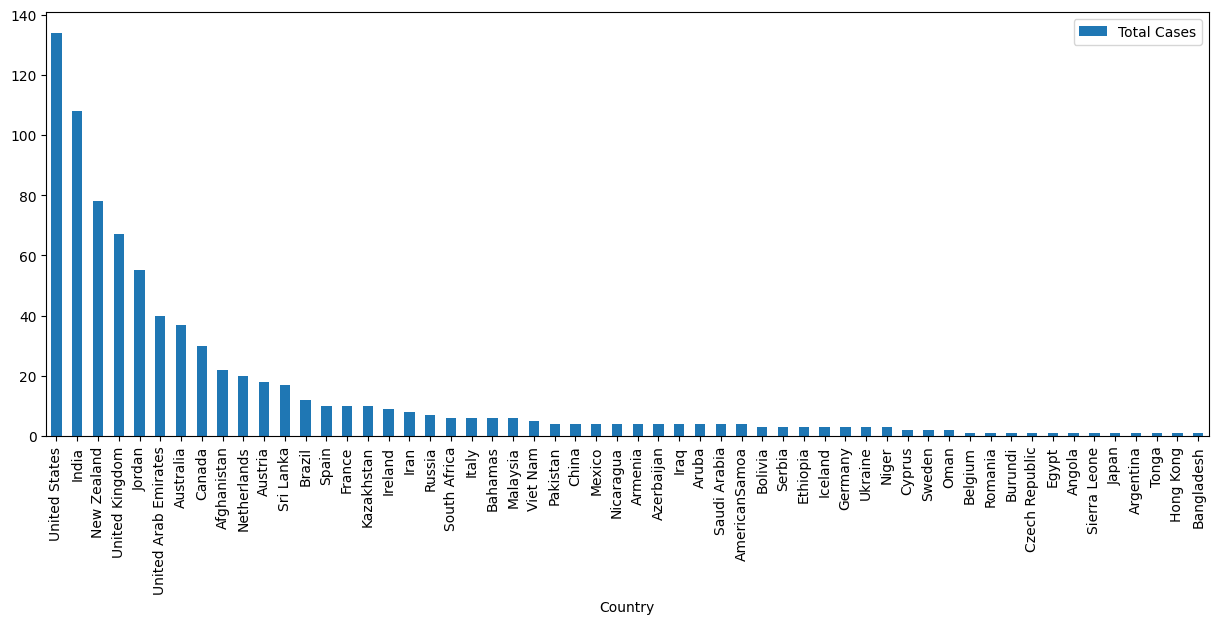

In [11]:
plt.rcParams["figure.figsize"] = (15,5.5)
country_df.plot.bar('Country', 'Total Cases')

In [12]:
count1 = autism_df['A1_Score'].value_counts()
print(count1)
count2 = autism_df['A2_Score'].value_counts()
print(count2)
count3 = autism_df['A3_Score'].value_counts()
print(count3)
count4 = autism_df['A4_Score'].value_counts()
print(count4)
count5 = autism_df['A5_Score'].value_counts()
print(count5)
count6 = autism_df['A6_Score'].value_counts()
print(count6)
count7 = autism_df['A7_Score'].value_counts()
print(count7)
count8 = autism_df['A8_Score'].value_counts()
print(count8)
count9 = autism_df['A9_Score'].value_counts()
print(count9)
count10 = autism_df['A10_Score'].value_counts()
print(count10)

1    448
0    352
Name: A1_Score, dtype: int64
1    424
0    376
Name: A2_Score, dtype: int64
0    440
1    360
Name: A3_Score, dtype: int64
0    468
1    332
Name: A4_Score, dtype: int64
0    484
1    316
Name: A5_Score, dtype: int64
0    557
1    243
Name: A6_Score, dtype: int64
0    482
1    318
Name: A7_Score, dtype: int64
1    407
0    393
Name: A8_Score, dtype: int64
0    404
1    396
Name: A9_Score, dtype: int64
1    494
0    306
Name: A10_Score, dtype: int64


In [13]:
scores_df = autism_df[['A1_Score',
               'A2_Score',
               'A3_Score',
               'A4_Score',
               'A5_Score',
               'A6_Score',
               'A7_Score',
               'A8_Score',
               'A9_Score',
               'A10_Score']]
scores_df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
0,1,0,1,0,1,0,1,0,1,1
1,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,1,1
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,1,0,0,1,1
6,1,0,0,0,0,0,1,1,1,0
7,1,1,1,1,1,1,1,0,1,1
8,1,1,1,1,0,0,0,1,1,1
9,0,0,0,0,0,0,0,1,0,1


In [14]:
scores_df.corr()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
A1_Score,1.000000,0.401419,0.493016,0.383718,0.432912,0.371917,0.447262,0.191815,0.439397,0.390478
A2_Score,0.401419,1.000000,0.489330,0.488173,0.427895,0.447721,0.452713,0.302040,0.511547,0.454422
A3_Score,0.493016,0.489330,1.000000,0.558896,0.579769,0.511669,0.559118,0.315882,0.597022,0.510276
A4_Score,0.383718,0.488173,0.558896,1.000000,0.559748,0.563543,0.554838,0.360781,0.576723,0.506292
A5_Score,0.432912,0.427895,0.579769,0.559748,1.000000,0.494944,0.550663,0.292747,0.524624,0.436010
A6_Score,0.371917,0.447721,0.511669,0.563543,0.494944,1.000000,0.496588,0.333694,0.536666,0.419172
A7_Score,0.447262,0.452713,0.559118,0.554838,0.550663,0.496588,1.000000,0.271903,0.539433,0.455326
A8_Score,0.191815,0.302040,0.315882,0.360781,0.292747,0.333694,0.271903,1.000000,0.352747,0.250438
A9_Score,0.439397,0.511547,0.597022,0.576723,0.524624,0.536666,0.539433,0.352747,1.000000,0.485983
A10_Score,0.390478,0.454422,0.510276,0.506292,0.436010,0.419172,0.455326,0.250438,0.485983,1.000000


<AxesSubplot: >

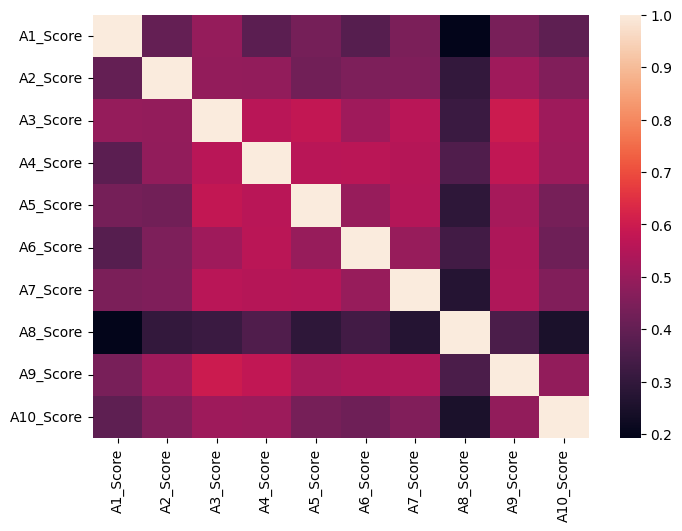

In [15]:
plt.rcParams["figure.figsize"] = (8,5.5)
sns.heatmap(scores_df.corr())


In [16]:
print(scores_df.isnull().sum(axis = 0))

A1_Score     0
A2_Score     0
A3_Score     0
A4_Score     0
A5_Score     0
A6_Score     0
A7_Score     0
A8_Score     0
A9_Score     0
A10_Score    0
dtype: int64


In [17]:
scores_df.dtypes

A1_Score     int64
A2_Score     int64
A3_Score     int64
A4_Score     int64
A5_Score     int64
A6_Score     int64
A7_Score     int64
A8_Score     int64
A9_Score     int64
A10_Score    int64
dtype: object

In [18]:
sum_score = pd.DataFrame(columns=['raw_score'])
sums = []

for index in range(len(scores_df.index)):
    row = scores_df.iloc[[index]]

    sum = int(row['A1_Score'])+ int(row['A2_Score'])+ int(row['A3_Score'])+ int(row['A4_Score'])+ int(row['A5_Score'])+ int(row['A6_Score'])+ int(row['A7_Score'])+ int(row['A8_Score'])+ int(row['A9_Score'])+ int(row['A10_Score'])
    sums.append(sum)

    sum_score.loc[index] = [sum]

In [19]:
autism_new = pd.concat([autism_df, sum_score], axis=1)
autism_new

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,result,Class/ASD,raw_score
0,1,0,1,0,1,0,1,0,1,1,38.172746,f,Others,no,no,Austria,6.351166,0,6
1,0,0,0,0,0,0,0,0,0,0,47.750517,m,Others,no,no,India,2.255185,0,0
2,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,14.851484,1,10
3,0,0,0,0,0,0,0,0,0,0,23.561927,f,Others,no,no,United States,2.276617,0,0
4,0,0,0,0,0,0,0,0,0,0,43.205790,m,Others,no,no,South Africa,-4.777286,0,0
5,1,0,0,0,0,1,0,0,1,1,31.527964,m,Middle Eastern,no,no,Jordan,9.562117,0,4
6,1,0,0,0,0,0,1,1,1,0,28.427971,f,Pasifika,no,no,United Kingdom,7.984569,0,4
7,1,1,1,1,1,1,1,0,1,1,26.484494,m,Black,no,yes,United States,13.237898,1,9
8,1,1,1,1,0,0,0,1,1,1,48.203459,m,White-European,no,no,Brazil,-1.755774,0,7
9,0,0,0,0,0,0,0,1,0,1,24.167945,f,Others,yes,no,New Zealand,14.922570,0,2


In [20]:
diff_score = pd.DataFrame(columns=['diff_score'])

for index in range(len(autism_new.index)):
    row = autism_new.iloc[[index]]

    diff = float(row['result'])- int(row['raw_score'])
    diff_score.loc[index] = [diff]
    
print(diff_score)

     diff_score
0      0.351166
1      2.255185
2      4.851484
3      2.276617
4     -4.777286
5      5.562117
6      3.984569
7      4.237898
8     -8.755774
9     12.922570
10     4.839255
11     6.730771
12    -1.218223
13     6.449159
14     9.798030
15     2.778929
16     3.495260
17    -7.095811
18    -4.867772
19     2.286905
20     4.995403
21     5.917927
22     0.094296
23     4.686719
24     4.823938
25    -1.595701
26     2.055675
27    -2.612312
28    -0.387512
29     5.770715
30     7.189531
31     0.412387
32     1.405741
33     2.647281
34     9.650866
35     6.112454
36     3.056010
37     4.832674
38     3.409354
39     3.451322
40     3.346515
41    -1.612008
42     4.064242
43     6.078623
44     5.165910
45     1.903541
46    -1.148262
47     4.761784
48     4.512264
49    11.983391
50     5.164184
51    -0.505289
52     3.920188
53     9.061898
54     0.264860
55    -1.458509
56     3.965200
57    -2.397522
58     4.248683
59     3.631819
60    12.371113
61     2

In [21]:
#turning the negatives into positives
pos_diff_score = pd.DataFrame(columns=['diff_score'])
low = diff_score.iloc[[215]]

for index in range(len(diff_score.index) - 1):
    row = diff_score.iloc[[index]]
    pos_diff_score.loc[len(pos_diff_score.index)] = [float(row['diff_score']) - float(low['diff_score'])]
pos_diff_score.head()

,diff_score
0,10.524664
1,12.428683
2,15.024982
3,12.450115
4,5.396212


In [22]:
new_df = pd.concat([autism_new, pos_diff_score], axis=1)
new_df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,result,Class/ASD,raw_score,diff_score
0,1,0,1,0,1,0,1,0,1,1,38.172746,f,Others,no,no,Austria,6.351166,0,6,10.524664
1,0,0,0,0,0,0,0,0,0,0,47.750517,m,Others,no,no,India,2.255185,0,0,12.428683
2,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,14.851484,1,10,15.024982
3,0,0,0,0,0,0,0,0,0,0,23.561927,f,Others,no,no,United States,2.276617,0,0,12.450115
4,0,0,0,0,0,0,0,0,0,0,43.205790,m,Others,no,no,South Africa,-4.777286,0,0,5.396212
5,1,0,0,0,0,1,0,0,1,1,31.527964,m,Middle Eastern,no,no,Jordan,9.562117,0,4,15.735615
6,1,0,0,0,0,0,1,1,1,0,28.427971,f,Pasifika,no,no,United Kingdom,7.984569,0,4,14.158067
7,1,1,1,1,1,1,1,0,1,1,26.484494,m,Black,no,yes,United States,13.237898,1,9,14.411396
8,1,1,1,1,0,0,0,1,1,1,48.203459,m,White-European,no,no,Brazil,-1.755774,0,7,1.417724
9,0,0,0,0,0,0,0,1,0,1,24.167945,f,Others,yes,no,New Zealand,14.922570,0,2,23.096068


In [23]:
new_df = new_df.drop(["raw_score","A1_Score","A2_Score","A3_Score","A4_Score","A5_Score","A6_Score","A7_Score","A8_Score","A9_Score","A10_Score","result"], axis = 1)
new_df

,age,gender,ethnicity,jaundice,austim,contry_of_res,Class/ASD,diff_score
0,38.172746,f,Others,no,no,Austria,0,10.524664
1,47.750517,m,Others,no,no,India,0,12.428683
2,7.380373,m,White-European,no,yes,United States,1,15.024982
3,23.561927,f,Others,no,no,United States,0,12.450115
4,43.205790,m,Others,no,no,South Africa,0,5.396212
5,31.527964,m,Middle Eastern,no,no,Jordan,0,15.735615
6,28.427971,f,Pasifika,no,no,United Kingdom,0,14.158067
7,26.484494,m,Black,no,yes,United States,1,14.411396
8,48.203459,m,White-European,no,no,Brazil,0,1.417724
9,24.167945,f,Others,yes,no,New Zealand,0,23.096068


In [24]:
new_df = new_df.dropna()

In [25]:
new_df[new_df.isna().any(axis=1)]

,age,gender,ethnicity,jaundice,austim,contry_of_res,Class/ASD,diff_score


In [26]:
new_df.dtypes

age              float64
gender            object
ethnicity         object
jaundice          object
austim            object
contry_of_res     object
Class/ASD          int64
diff_score       float64
dtype: object

In [27]:
le = LabelEncoder()
for columns in new_df.columns:
    if new_df[columns].dtype == object:
        new_df[columns] = le.fit_transform(new_df[columns])       
new_df.sample(25)

C:\Users\juane\AppData\Local\Temp\ipykernel_17976\3399696135.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[columns] = le.fit_transform(new_df[columns])


,age,gender,ethnicity,jaundice,austim,contry_of_res,Class/ASD,diff_score
713,52.987677,1,5,0,0,52,0,16.827888
756,80.544085,0,9,1,1,53,1,12.482056
769,22.990880,1,5,0,0,31,0,12.504844
700,33.571888,1,9,1,0,54,1,5.323017
203,37.472088,1,4,0,0,24,0,7.348515
763,13.670266,0,5,0,0,15,0,9.516800
608,29.296160,1,1,1,1,38,1,10.721459
742,20.548171,0,9,0,0,53,1,15.436263
681,18.125611,0,9,0,1,54,1,14.474624
432,24.692087,1,9,0,0,35,0,15.148062


In [28]:
new_df.corr()

,age,gender,ethnicity,jaundice,austim,contry_of_res,Class/ASD,diff_score
age,1.000000,-0.038435,0.044523,-0.019871,0.048664,-0.014873,0.110679,-0.329448
gender,-0.038435,1.000000,-0.035092,-0.004495,0.015050,-0.070691,-0.005256,0.062027
ethnicity,0.044523,-0.035092,1.000000,0.169727,0.218093,0.143285,0.364329,-0.041314
jaundice,-0.019871,-0.004495,0.169727,1.000000,0.109539,0.004709,0.138487,-0.019422
austim,0.048664,0.015050,0.218093,0.109539,1.000000,0.203723,0.359040,-0.085897
contry_of_res,-0.014873,-0.070691,0.143285,0.004709,0.203723,1.000000,0.214441,-0.018086
Class/ASD,0.110679,-0.005256,0.364329,0.138487,0.359040,0.214441,1.000000,-0.088146
diff_score,-0.329448,0.062027,-0.041314,-0.019422,-0.085897,-0.018086,-0.088146,1.000000


<AxesSubplot: >

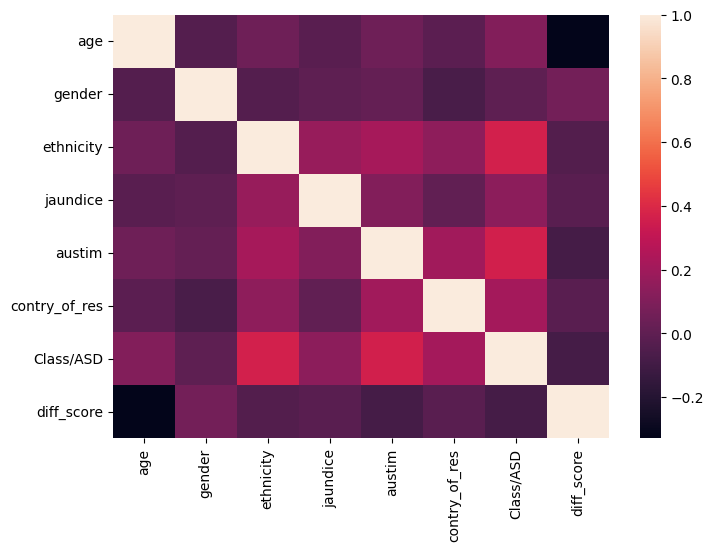

In [29]:
sns.heatmap(new_df.corr())

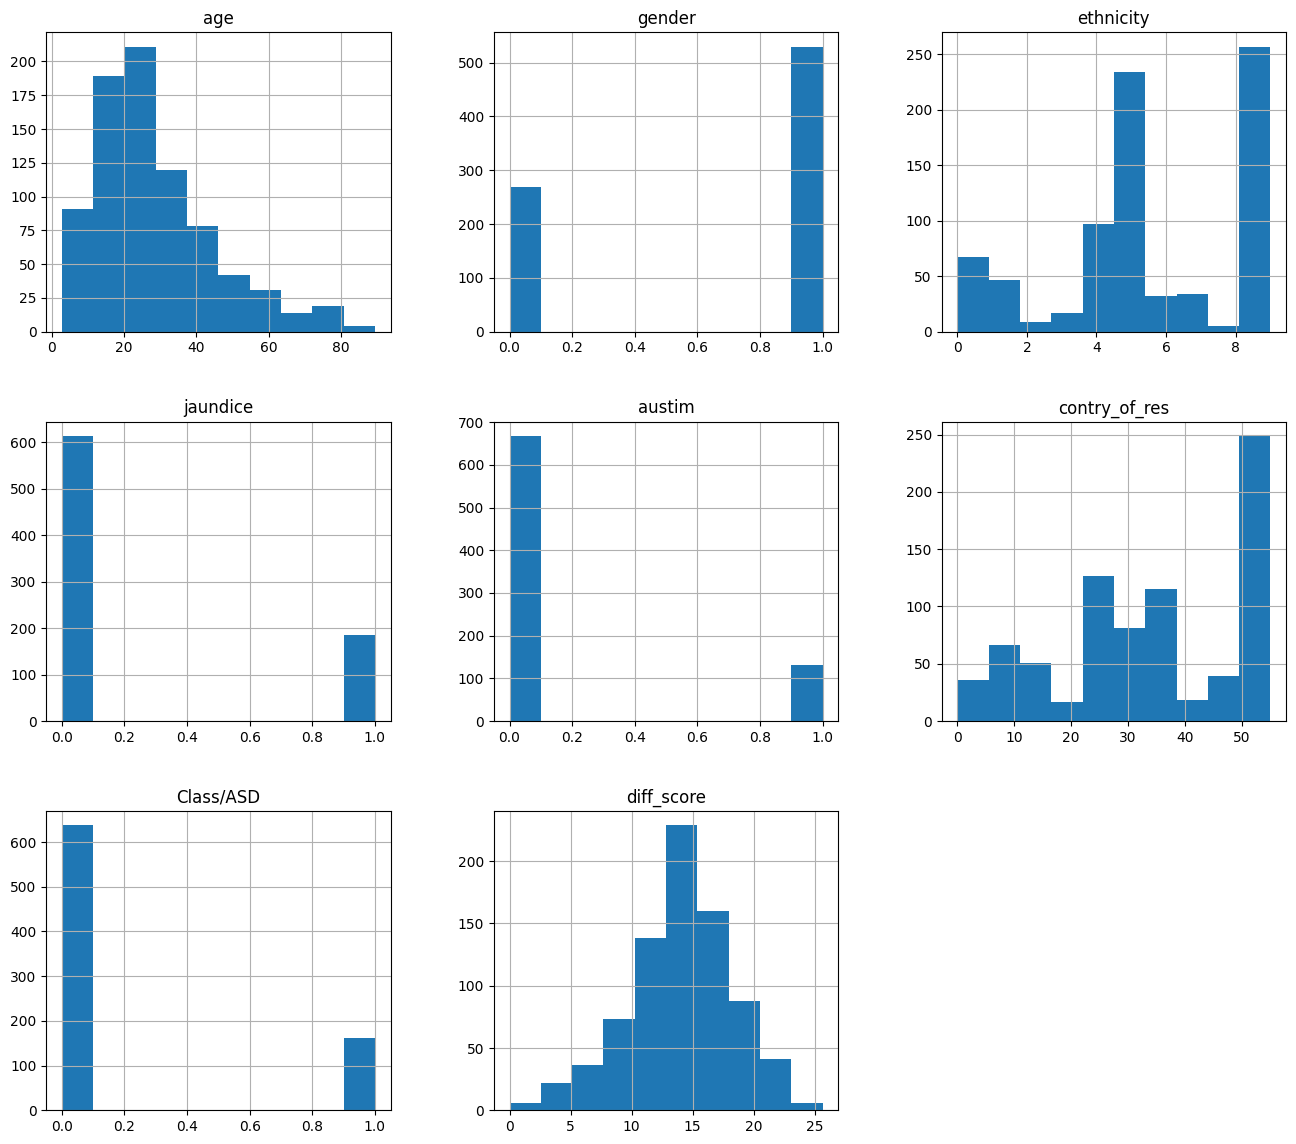

In [30]:
new_df.hist(figsize=(16, 14));

In [31]:
# partition: train/test = 80/20
attributes = [col for col in new_df.columns if col != "Class/ASD"]
train_x, test_x, train_y, test_y = train_test_split(new_df[attributes], new_df["Class/ASD"], test_size=0.2, random_state=500)

df_train_x = pd.DataFrame(train_x, columns=new_df.columns)
df_test_x = pd.DataFrame(test_x, columns=new_df.columns)
df_train_y = pd.DataFrame(train_y, columns=["Class/ASD"])
df_test_y = pd.DataFrame(test_y, columns=["Class/ASD"])

print ("shapes")
print (train_x.shape)
print (test_x.shape)
print (train_y.shape)
print (test_y.shape)

print 

print ("Class/ASD counts")
print (new_df["Class/ASD"].value_counts())
print (train_y.value_counts())
print (test_y.value_counts())

df_train_x = df_train_x.drop('Class/ASD', axis=1)
df_test_x = df_test_x.drop('Class/ASD', axis=1)
df_train_y = df_train_y.drop('Class/ASD', axis=1)
df_test_y = df_test_y.drop('Class/ASD', axis=1)

shapes
(639, 7)
(160, 7)
(639,)
(160,)
Class/ASD counts
0    638
1    161
Name: Class/ASD, dtype: int64
0    508
1    131
Name: Class/ASD, dtype: int64
0    130
1     30
Name: Class/ASD, dtype: int64


In [32]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_x, train_y)
pred_y = clf.predict(test_x) 

for line in classification_report(test_y, pred_y).split("\n"):
    print (line)

              precision    recall  f1-score   support

           0       0.86      0.78      0.81       130
           1       0.31      0.43      0.36        30

    accuracy                           0.71       160
   macro avg       0.58      0.61      0.59       160
weighted avg       0.75      0.71      0.73       160



In [33]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_x, train_y)
pred_y = clf.predict(test_x)

print ("f1:" + str(f1_score(pred_y, test_y)))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y)))
print ("recall:" + str(recall_score(pred_y, test_y)))

f1:0.3384615384615384
accuracy:0.73125
precision:0.36666666666666664
recall:0.3142857142857143


In [34]:
clf = LinearSVC(random_state=123)
clf = clf.fit(train_x, train_y)
pred_y = clf.predict(test_x)

print ("f1:" + str(f1_score(pred_y, test_y)))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y)))
print ("recall:" + str(recall_score(pred_y, test_y)))

f1:0.42553191489361697
accuracy:0.83125
precision:0.3333333333333333
recall:0.5882352941176471


C:\Users\juane\.pyenv\pyenv-win\versions\3.10.0\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [35]:
naive_bayes = GaussianNB()
naive_bayes.fit(train_x , train_y)
y_pred = naive_bayes.predict(test_x)

print ("f1:" + str(f1_score(pred_y, test_y)))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y)))
print ("recall:" + str(recall_score(pred_y, test_y)))

f1:0.42553191489361697
accuracy:0.83125
precision:0.3333333333333333
recall:0.5882352941176471


In [36]:
attributes = [col for col in new_df if col != "Class/ASD"]

# partition: train/test = 70/30
train_x, test_x, train_y, test_y = train_test_split(new_df[attributes], new_df["Class/ASD"], test_size=0.3, random_state=123)

# convert numpy arrays to data frames
df_train_x = pd.DataFrame(train_x, columns=attributes)
df_test_x = pd.DataFrame(test_x, columns=attributes)
df_train_y = pd.DataFrame(train_y, columns=["Class/ASD"])
df_test_y = pd.DataFrame(test_y, columns=["Class/ASD"])

print ("shapes")
print (df_train_x.shape)
print (df_test_x.shape)
print (df_train_y.shape)
print (df_test_y.shape)

print 
attributes
print ("class counts")
print (new_df["Class/ASD"].value_counts())
print (df_train_y["Class/ASD"].value_counts())
print (df_test_y["Class/ASD"].value_counts())

shapes
(559, 7)
(240, 7)
(559, 1)
(240, 1)
class counts
0    638
1    161
Name: Class/ASD, dtype: int64
0    443
1    116
Name: Class/ASD, dtype: int64
0    195
1     45
Name: Class/ASD, dtype: int64


In [37]:
f_val, p_val = chi2(df_train_x, df_train_y["Class/ASD"]) 

# print the Chi-squared valus and p values
df_scores = pd.DataFrame(zip(attributes, f_val, p_val), columns=["feature", "chi2", "p"])
df_scores["chi2"] = df_scores["chi2"].round(2)
df_scores["p"] = df_scores["p"].round(3)
#print df_scores.sort_values("chi2", ascending=False)

# use features with p < 0.05
sel_ohe_cols = df_scores[df_scores["p"]<0.05]["feature"].values
print ("\nSelected features: %d" % len(sel_ohe_cols))
print (sel_ohe_cols)


Selected features: 6
['age' 'ethnicity' 'jaundice' 'austim' 'contry_of_res' 'diff_score']


In [38]:
clf = LinearSVC()
clf = clf.fit(df_train_x[sel_ohe_cols], train_y)
#df_importance = pd.DataFrame(zip(df_train_x.columns, clf.coef_[0]), columns=["feature", "weight"])
#df_importance.sort_values("weight", ascending=False)
pred_y = clf.predict(df_test_x[sel_ohe_cols])
print ("f1:" + str(f1_score(pred_y, test_y)))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y)))
print ("recall:" + str(recall_score(pred_y, test_y)))

f1:0.3389830508474576
accuracy:0.8375
precision:0.2222222222222222
recall:0.7142857142857143


C:\Users\juane\.pyenv\pyenv-win\versions\3.10.0\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [55]:
clf = tree.DecisionTreeClassifier()
# train model
clf = clf.fit(train_x, train_y)
# make prediction
pred_y = clf.predict(test_x)
# evaluate the prediction results


print ("f1:" + str(f1_score(pred_y, test_y)))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y)))
print ("recall:" + str(recall_score(pred_y, test_y)))

f1:0.4523809523809524
accuracy:0.8083333333333333
precision:0.4222222222222222
recall:0.48717948717948717


In [40]:
input_dim = train_x.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(5, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [41]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
               metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 40        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________


In [43]:
history = model.fit(train_x, train_y,
                     epochs=100,
                     verbose=False,
                     validation_data=(test_x, test_y),
                     batch_size=5)

In [44]:
history.params

{'verbose': False, 'epochs': 100, 'steps': 112}

In [45]:
history.history

{'loss': [1.8839755058288574,
  1.2608739137649536,
  0.9228696823120117,
  0.7685863375663757,
  0.7121690511703491,
  0.6830891370773315,
  0.6544622778892517,
  0.6304922103881836,
  0.6242688894271851,
  0.6008279919624329,
  0.5815502405166626,
  0.5758734941482544,
  0.5564370155334473,
  0.5466222763061523,
  0.5374351143836975,
  0.5283538103103638,
  0.5198814868927002,
  0.5160701870918274,
  0.49846309423446655,
  0.490862101316452,
  0.482115238904953,
  0.4812299311161041,
  0.4737844169139862,
  0.4733569622039795,
  0.4604707956314087,
  0.4632375240325928,
  0.4587627947330475,
  0.45451247692108154,
  0.46105486154556274,
  0.4526740312576294,
  0.4467827379703522,
  0.45110762119293213,
  0.44423264265060425,
  0.44417667388916016,
  0.44809192419052124,
  0.44774922728538513,
  0.4446885287761688,
  0.4381813406944275,
  0.43548181653022766,
  0.43895962834358215,
  0.43845388293266296,
  0.43712350726127625,
  0.4348295331001282,
  0.4339088499546051,
  0.4343931972

In [46]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

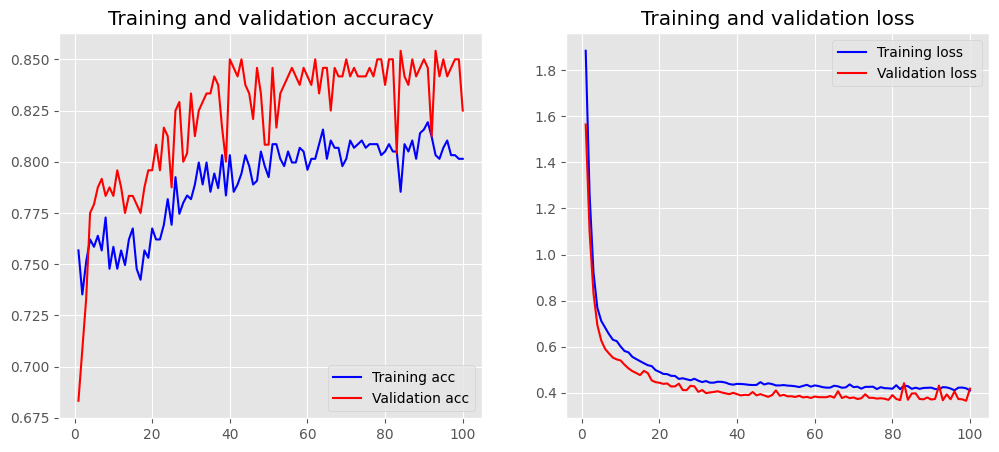

In [47]:
plot_history(history)

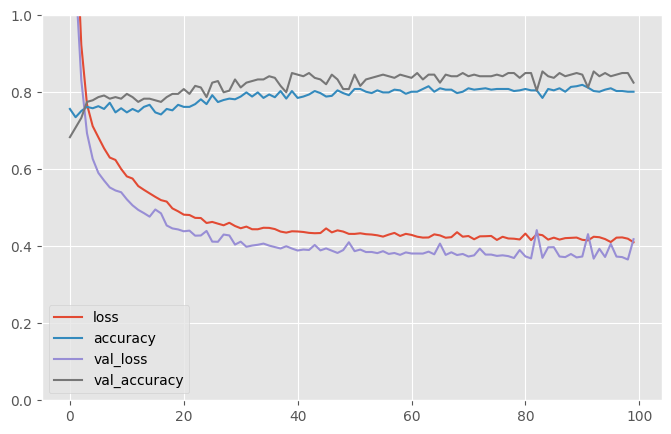

In [48]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [49]:
loss, accuracy = model.evaluate(train_x, train_y, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(test_x, test_y, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.7889
Testing Accuracy:  0.8250


In [50]:
clf = LogisticRegression()
# train model
clf = clf.fit(train_x, train_y)
# make prediction
pred_y = clf.predict(test_x)
# evaluate the prediction results
print ("f1:" + str(f1_score(pred_y, test_y)))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y)))
print ("recall:" + str(recall_score(pred_y, test_y)))

f1:0.5428571428571428
accuracy:0.8666666666666667
precision:0.4222222222222222
recall:0.76


In [51]:
X_valid, X_train = train_x[:266], train_x[266:]
y_valid, y_train = train_y[:266], train_y[266:]

In [52]:
history = model.fit(X_train, y_train,
                     epochs=100,
                     verbose=False,
                     validation_data=(X_valid, y_valid),
                     batch_size=10)

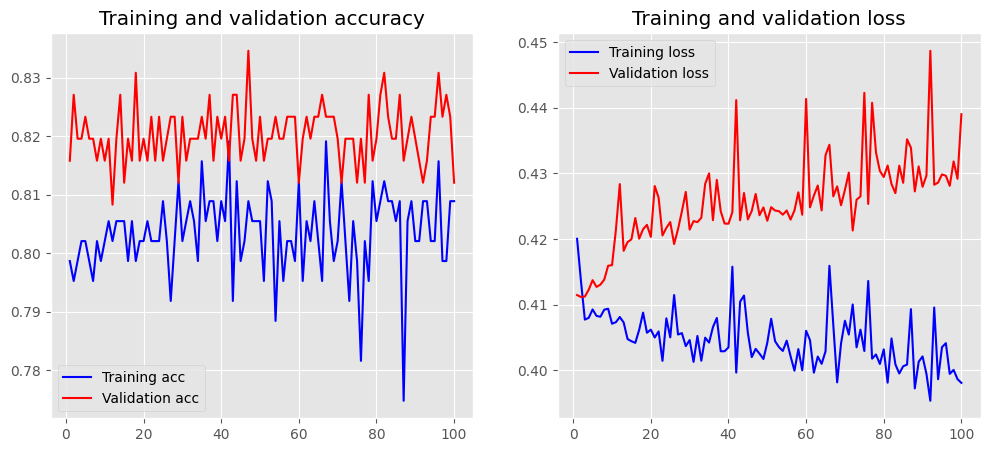

In [53]:
plot_history(history)

In [54]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(test_x, test_y, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.8123
Testing Accuracy:  0.8500
